# Connection matrix of all simplexes in the simplicial complex
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Introduction**
In this notebook, we will generate the connection matrix as required for Knill's free energy calculation. We start with any given connection matrix for solely pairwise connections. From this we draw a complete connectivity graph and count all complete subgraphs. Each complete subgraph is converted into a simplex. Next, all simplices in the graph are counted to generate a list of simplices, the 'clique_complex', representing all simplices in the simplicial complex. Lastly, we generate the complete connection matrix, i.e. with connections between all simplices included and not just the connections between vertices. We do this by checking which simplices have overlapping vertices, so:

A finite abstract simplicial complex G defines a matrix L, where $L(x,y) = 1$ if two simplicies $x, y$ in G intersect and where $L(x,y) = 0$ if they don't.

*Knill proves in his 'energy of simplicial complex' that the sum over all entries of the inverse of this matrix is the total energy (equal to the Euler Characteristic).*

In [2]:
# Import libraries
import networkx as nx
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
# Define function to draw a visual graph from the connection matrix
def plot_graph(correlation_matrix, threshold):
    n = correlation_matrix.shape[0]
    G = nx.Graph()
    
    for i in range(n):
        for j in range(i + 1, n):
            if abs(correlation_matrix[i, j]) > threshold:
                G.add_edge(i, j)

    pos = nx.spring_layout(G)  # You can use a different layout if needed
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700)
    plt.show()

# Define a function to obtain a list the simplexes present in the simplicial complex, by counting the complete subgraphs in the connection matrix
def build_clique_complex(correlation_matrix, threshold, max_clique_size):
    n = correlation_matrix.shape[0]
    G = nx.Graph()
    for i in range(n):
        for j in range(i + 1, n):
            if abs(correlation_matrix[i, j]) > threshold:
                G.add_edge(i, j)

    # Using nx.enumerate_all_cliques in an interactive manner
    seen_cliques = set()
    for clique in nx.enumerate_all_cliques(G):
        if len(clique) > max_clique_size:
            break
        unique_clique = tuple(sorted(clique))
        seen_cliques.add(unique_clique)

    # Building the clique complex
    clique_complex = [set(clique) for clique in seen_cliques]

    # Sort the list of sets based on the length of cliques and sorted vertices within each clique
    clique_complex = sorted(clique_complex, key=lambda x: (len(x), sorted(x)))

    return clique_complex

# Define a function to generate a connection matrix of the simplexes from the list of cliques
def generate_overlap_matrix(sets_list):
    # Get the set of all unique values in the list of sets
    all_values = sorted(list({value for s in sets_list for value in s}))
    
    # Create a mapping from values to indices
    value_to_index = {value: index for index, value in enumerate(all_values)}
    
    # Initialize the overlap matrix with zeros
    n = len(sets_list)
    overlap_matrix = np.zeros((n, n), dtype=int)
    
    # Set the entries to 1 where values overlap
    for i, s1 in enumerate(sets_list):
        values_s1 = sorted(list(s1))
        indices_s1 = [value_to_index[value] for value in values_s1]
        
        for j, s2 in enumerate(sets_list):
            values_s2 = sorted(list(s2))
            indices_s2 = [value_to_index[value] for value in values_s2]
            
            if any(value in s2 for value in s1):  # Check for overlap
                overlap_matrix[i, j] = 1
    
    return overlap_matrix


[{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {0, 2}, {0, 3}, {0, 5}, {0, 6}, {0, 7}, {1, 2}, {1, 3}, {1, 4}, {1, 5}, {1, 7}, {2, 3}, {2, 6}, {3, 4}, {4, 6}, {8, 5}, {8, 6}, {0, 2, 3}, {0, 2, 6}, {1, 2, 3}, {1, 3, 4}]


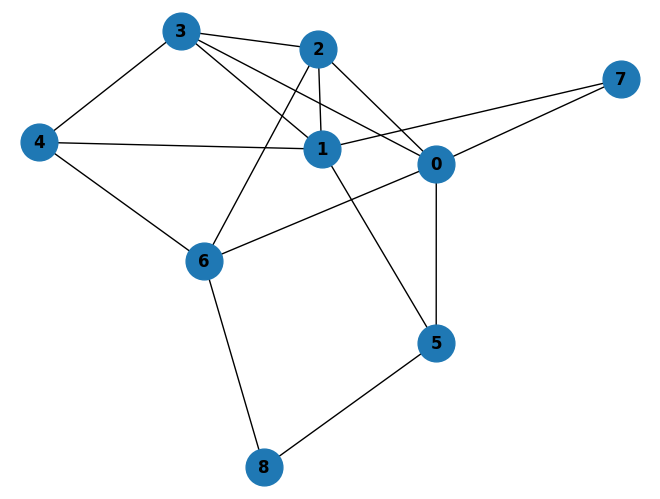

In [4]:
# Example usage
correlation_matrix = np.random.rand(9, 9)
threshold = 0.5
max_clique_size = 3

clique_complex = build_clique_complex(correlation_matrix, threshold, max_clique_size)
print(clique_complex)

plot_graph(correlation_matrix, threshold)

In [7]:
# Importing data as list of matrices
matrices = [np.genfromtxt(file) for file in glob.glob('./1000_Functional_Connectomes/Connectivity matrices/*_matrix_file.txt')]

In [8]:
# Test on the real data
correlation_matrix = matrices[3] # Replace with your correlation matrix
threshold = 0.9  # Set your threshold
max_clique_size = 3  # Set the maximum size of the cliques

clique_complex = build_clique_complex(correlation_matrix, threshold, max_clique_size)
clique_complex = sorted(clique_complex)
print(clique_complex)

[{25}, {37}, {51}, {56}, {94}, {25, 51}, {56, 25}, {37, 94}]


In [9]:
# Example usage
overlap_matrix = generate_overlap_matrix(clique_complex)
print(overlap_matrix)

[[1 0 0 0 0 1 1 0]
 [0 1 0 0 0 0 0 1]
 [0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 1]
 [1 0 1 0 0 1 1 0]
 [1 0 0 1 0 1 1 0]
 [0 1 0 0 1 0 0 1]]
